# Mathematik für Studierende der Chemie: Python Kurs 3

# Lineare Regression in Python

## 1. Einfache lineare Regression mit scikit-learn


Die Durchführung einer linearen Regression lässt sich in fünf Schritte zerlegen:

1. Importieren der notwendigen Pakete und Klassen.
2. Bereitstellung der Daten in der gewünschten Form.
3. Erzeugen des zugehörigen Modells und dessen Anwendung auf die vorhandenen Daten.
4. Überprüfung der Resultate auf ihre Plausibilität.
5. Falls nötig, Nutzung des Modells für Vorhersagen.

Diese Schritte sind für fast alle Regressionsverfahren anwendbar. 
Eine grundlegende Vorstellung zur linearen Regression, wo die Prinzipien des obengenannten Verfahrens erklärt werden, findet ihr in dem [Jupyter-Notebook von Prof. Dr. Burkhard Geil](https://mybinder.org/v2/git/https%3A%2F%2Fgitlab.gwdg.de%2Fgoe-chem-jupyter%2Fcda.git/HEAD?filepath=lineare_regression.ipynb) aus der ergänzenden Materialien seiner Vorlesung "Computergesetützte Datenanalyse". 

#### Schritt 1: Importieren der Pakete und Klassen

Das `scikit-learn`-Tool ermöglicht prädiktive Datenanalyse. Wir wollen uns das Tool für die lineare Regression im Folgenden genauer anschauen.

In [1]:
import numpy as np
from sklearn.linear_model import LinearRegression

Bei der linearen Regression wird angenommen, dass der Zielwert, der vorhergesagt wird, eine Linearkombination der gegebenen Daten ist. 

#### Schritt 2: Bereitstellung der Daten

In [2]:
x = np.array([5, 15, 25, 35, 45, 55]).reshape((-1, 1))
y = np.array([5, 20, 14, 32, 22, 38])

Die Funktion `.reshape()` transformiert das Array von (1x6) zu (6x1). Die Anwendung von `.reshape()` auf `x` ist notwendig, da dieses Array für die Anwendung von der linearen Regression eine Spalte und beliebig viele Zeilen haben muss.

In [3]:
print(x)
print(y)

[[ 5]
 [15]
 [25]
 [35]
 [45]
 [55]]
[ 5 20 14 32 22 38]


Überprüfen wir vorsichtshalber die Form (shape) der Arrays mit `np.shape()`:

In [4]:
print(np.shape(x))
print(np.shape(y))

(6, 1)
(6,)


*Hinweis!* Normalerweise erstellt ihr euch eure Daten nicht 'per Hand', sondern nutzt Daten beispielsweise aus einem Experiment!

#### Schritt 3: Definieren des Modells und dessen Anwendung

In [5]:
model = LinearRegression()

Die Dokumentation https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html beschreibt die möglichen Einstellungen der Funktion `LinearRegression()`. Lest euch die Dokumentation durch, um das Verständnis für die hier möglichen Einstellungen zu bekommen. Auch um zu verstehen, wie Dokumentationen grundsätzlich aufgebaut sind.

Die möglichen Methoden, die mit dieser Funktion durchgeführt werden können, sind ebenfalls mit ihren einzelnen Einstellungen aufgeführt. Wir verwenden zuerst die Methode `.fit()`, um unser Modell zu fitten.

In [6]:
model.fit(x, y);

Die obigen beiden Anweisungen können in einer Zeile zusammengefasst werden.

In [7]:
model = LinearRegression().fit(x, y)

#### Schritt 4: Ergebnisse

Die Anwendung von `.score()` mit den Werten `x` und `y` liefert als Ergebnis 𝑅², welches einen Gütefaktor des Fits darstellt (für weitere Erklärungen in der Dokumentation (siehe oben) nachlesen).

In [8]:
r_sq = model.score(x, y)
print(f"coefficient of determination: {r_sq:.2f}")

coefficient of determination: 0.72


In [9]:
print(f"intercept: {model.intercept_:.2f}, slope: {model.coef_}")

intercept: 5.63, slope: [0.54]


Der obige Code zeigt wie man w₀ und w₁ erhält. Hierbei ist zu beachten, dass `.intercept_` ein Skalar ist, wohingegen `.coef_` ein Feld darstellt.

Der Wert w₀ = 5.63 entspricht dem Wert für 𝑥 = 0. Der Wert w₁ = 0.54 gibt die Steigung *m* an.


#### Schritt 5: Vorhersagen

Mit der Funktion `.predict()` wird das lineare Modell genutzt, um Vorhersagen zu treffen. Im Folgenden werden mit Hilfe des Modells und den Werten in `x` die Werte für `y` vorhergesagt.

In [10]:
y_pred = model.predict(x)
print(f"predicted response: {y_pred}")

predicted response: [ 8.33333333 13.73333333 19.13333333 24.53333333 29.93333333 35.33333333]


Dies entspricht:

In [11]:
y_pred = model.intercept_ + model.coef_ * x
print(f"predicted response: {y_pred}")

predicted response: [[ 8.33333333]
 [13.73333333]
 [19.13333333]
 [24.53333333]
 [29.93333333]
 [35.33333333]]


Die `.predict()`-Funktion könnte beispielsweise für den folgenden einfachen Fall angewendet werden:
- die x-Werte seien Zeiten,
- die y-Werte Strecke, die nach jeweils 50 Zeitschritten gemessen wurden.

Wenn wir nun eine Strecke bei einem Zeitschritt haben wollen, den wir nicht gemessen haben, können wir unser Modell diesen Zeitwert geben und bekommen eine Strecke zurück.

### **Aufgabe 1:** 
Führt die fünf Schritte der linearen Regression eigenständig durch (Schritt 1 ist in diesem Fall schon erledigt). 
- Erstellt euch zwei Wertearrays `data_x` und `data_y` mit unterschiedlichen Werten, aber passenden Größen.  
- Definiert ein Modell. 
- Lasst euch die Ergebnisse anzeigen und schreibt die Geradengleichung auf.
- Mit der `.predict()`-Funktion berechnet ihr `data_y` und überprüft, ob die Berechnung mit der Geradengleichung übereinstimmt.



In [12]:
# Bearbeitung von Aufgabe 1
# Lösung
data_x = np.array([2, 4, 9, 16, 25, 36]).reshape((-1, 1))
data_y = np.array([5, 20, 14, 32, 22, 38])

model1 = LinearRegression().fit(data_x, data_y)
r_sq = model1.score(data_x, data_y)
print(f"coefficient of determination: {r_sq:.2f}")
print(f"intercept: {model1.intercept_:.2f}, slope: {model1.coef_}")

data_y1_pred = model1.predict(data_x)
print(f"predicted response1: {data_y1_pred}")
data_y2_pred = model1.intercept_ + model1.coef_ * data_x
print(f"predicted response2: {data_y2_pred}")

coefficient of determination: 0.66
intercept: 10.57, slope: [0.73481937]
predicted response1: [12.03574174 13.50538048 17.17947733 22.32321291 28.93658724 37.01960031]
predicted response2: [[12.03574174]
 [13.50538048]
 [17.17947733]
 [22.32321291]
 [28.93658724]
 [37.01960031]]


### **Aufgabe 2:**
- Definiert euch über die `np.arange()`-Funktion ein neues Array `data_x_new`.
- Mit der `.predict()`-Funktion berechnet ihr `data_y_new` und lasst euch `data_y_new` anzeigen.

In [13]:
# Bearbeitung von Aufgabe 2
# Lösung
data_x_new = np.arange(0, 6, 1).reshape(-1,1)
print(data_x_new)
data_y_new = model1.predict(data_x_new)
print(data_y_new)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]]
[10.566103   11.30092237 12.03574174 12.77056111 13.50538048 14.24019985]


### **Aufgabe 3:** 
Zeichnet mit `matplotlib.pyplot` die von euch erstellten Daten in ein Diagramm zusammen mit der Geradengleichung, die ihr erhalten habt. Wählt dabei unterschiedliche Farben für die beiden Funktionen und ergänzt eine Legende und Achsenbeschriftungen.

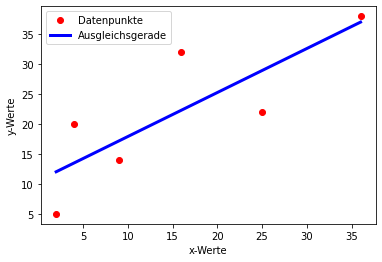

In [17]:
# Bearbeitung von Aufgabe 3
# Lösung
import matplotlib.pyplot as plt
plt.plot(data_x, data_y, 'ro', label = 'Datenpunkte') 
plt.plot(data_x, data_y1_pred, 'b-', linewidth=3, label = 'Ausgleichsgerade')
plt.xlabel('x-Werte')
plt.ylabel('y-Werte')
plt.legend()
plt.show()

# 2. Anwendung der linearen Regression mit scikit-learn auf Druck- und Volumenwerte
Im folgenden Abschnitt wollen wir eine Datei erstellen und die Daten für eine lineare Regression nutzen. Den ersten Schritt des Importierens können wir überspringen.

Wir wollen uns eine Datei schreiben, die Druck- und Volumenwerte beinhaltet. Dafür brauchen wir folgende Codezeile:

In [18]:
%%file gaspv.csv
Hp[cm] HV [cm]
0.0,16.2
1.8,16.0
3.3,15.9
5.0,15.1
6.8,14.9
8.3,14.6
10.0,14.0

Writing gaspv.csv


**Wichtig!** 
Dateien mit experimentellen Daten aus dem Praktikum können eingelesen werden (wie in den vorherigen Übungen auch schon gezeigt), in dem die Datei in den gleichen Ordner hochgeladen wird, indem dieses Notebook abgespeichert ist und wie im Beispiel geladen wird. So habt ihr die Möglichkeit die Auswertung von Experimenten für Protokolle mit den hier gezeigten Methoden durchzuführen!

Um zwei Arrays mit den Werten zu haben, müssen wir aus dieser Datei nun die Druck- und Volumenwerte einlesen und in einem Array abspeichern.

In [19]:
druck = np.loadtxt("gaspv.csv", delimiter=",", skiprows=1, usecols=[0])
volumen = np.loadtxt("gaspv.csv", delimiter=",", skiprows=1, usecols=[1])
print(druck)
druck = druck.reshape((-1, 1))
print(druck)

[ 0.   1.8  3.3  5.   6.8  8.3 10. ]
[[ 0. ]
 [ 1.8]
 [ 3.3]
 [ 5. ]
 [ 6.8]
 [ 8.3]
 [10. ]]


- Mit der Angabe des `delimiter` wird das Trennzeichen angegeben, bei dem die Werte getrennt werden sollen. Der default-Wert wäre ein Leerzeichen. Hier sind unsere Daten durch ein Komma getrennt, weswegen der delimiter die Angabe `","` bekommt.
- Mit `skiprows = 1` überspringen wir die erste Zeile beim Auslesen, da in dieser keine Werte sondern die Textangabe steht.
- Mit `usecols = [x]` wird angegeben, welche Spalten berücksichtigt werden sollen. Da Python bei 0 anfängt zu zählen, ist `usecols = [0]` die erste Zeile, `usecols = [1]` dementsprechend die zweite Zeile. 

Mit diesen gemachten Angaben erhalten wir die gewünschten Arrays mit Druck- und Volumenwerten.

Jetzt können wir die lineare Regression ausführen, indem wir uns ein Modell einführen und fitten.

In [20]:
model2 = LinearRegression().fit(druck, volumen)

In [21]:
r_sq = model2.score(druck, volumen)
slope = model2.coef_
intercept = model2.intercept_
volumen_predict = intercept + slope*druck
print('intercept + slope*x')
print(intercept + slope*druck)

intercept + slope*x
[[16.36753948]
 [15.96495433]
 [15.6294667 ]
 [15.24924738]
 [14.84666223]
 [14.5111746 ]
 [14.13095529]]


Um die Standardabweichung der Regression zu bekommen, müssen wir uns eine eigene Funktion schreiben, da `scikit-learn` uns keine interne Funktion zur Berechnung von Standardabweichungen zur Verfügung stellt. Da so eine Funktion den Rahmen dieses Kurses sprengen würde, wird im nächsten Abschnitt noch ein weiteres Tool zur Durchführung von linearer Algebra vorgestellt: `scipy.stats.linregess`, bei dem die Standardabweichung der Regression mit angegeben wird.

# 3. Weitere Möglichkeiten der linearen Regression - scipy.stats.linregess
Mit scipy.stats können lineare Regressionen durch die `.linregress()`-Funktion durchgeführt werden. Die Dokumentation ist unter dem folgenden Link zu finden: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.linregress.html#scipy.stats.linregress. 

Zunächst wird importiert:

In [22]:
from scipy.stats import linregress
import matplotlib.pyplot as plt

Wir nutzen wieder die Daten aus der gasp.csv-Datei.

In [23]:
druck = np.loadtxt("gaspv.csv", delimiter=",", skiprows=1, usecols=[0])
volumen = np.loadtxt("gaspv.csv", delimiter=",", skiprows=1, usecols=[1])

Jetzt können wir die lineare Regression ausführen. Die Funktion gibt uns mehrere Werte zurück, die wir einmal durchgehen:

In [24]:
m, b, r, p, std_slope = linregress(druck,volumen)
print(m, b, r, p, std_slope)

-0.22365841932024103 16.367539480010358 -0.9808168174184401 9.688972081350527e-05 0.01987901368738393


- Steigung: m
- Schnittpunkt mit y-Achse: b
- R-Wert/Korrelationskoeffizient: r
- p-value: p (nicht genauer erläutert)
- Standardfehler der Steigung: std_slope

Die genaueren Beschreibungen und restlichen Rückgabewerte sind in der Dokumentation nachzulesen.

Jetzt haben wir Werte für die Standardabweichung der Steigung erhalten und können damit die Fehler der Regressionsgeraden angeben, was in einigen Auswertungen verlangt wird.

### **Aufgabe 4:** 
Erstellt mit `matplotlib.pyplot` eine Abbildung, in der ihr sowohl die experimentellen Daten, als auch die Regressionsgerade in unterschiedlichen Farben darstellt. Zeichnet auch die Fehler ein!
Ergänzt eine Legende und beschriftet die Achsen sinnvoll.

*Hinweis:*

Für das Plotten brauchen wir einen Messfehler, da unsere Messwerte mit einer gewissen Unsicherheit abgelesen werden. Wir nehmen einen Fehler von 0.1 ml an.

Mit Hilfe der Funktion `.errorbar()` könnt ihr diesen Messfehler in der Auftragung berücksichtigen. Achtet darauf, dass ihr die Einstellungen so wählt, dass die Messwerte nicht miteinander verbunden werden und das die Fehlerbalken gleichmäßig dicke Linien (sowohl der vertikale, wie auch die horizontalen Linien) haben. Die Dokumentation werdet ihr dafür brauchen: https://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.errorbar.

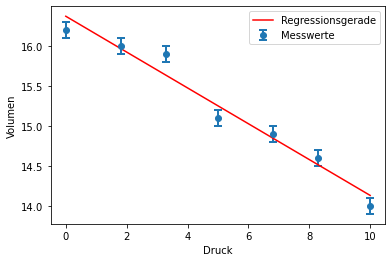

In [25]:
# Bearbeitung von Aufgabe 4
# Lösung
#plt.plot(druck, volumen, 'o', label='Messwerte')
plt.errorbar(druck,volumen,yerr=0.1, marker='o', linestyle='none', elinewidth=2, capthick=2, capsize=4, label='Messwerte')
plt.plot(druck, b + m*druck, 'r', label='Regressionsgerade')
plt.xlabel('Druck')
plt.ylabel('Volumen')
plt.legend()
plt.show()

# Anwendungsbeispiel

Abschließend wollen wir uns ein Beispieldatensatz ansehen und die lineare Regression darauf anwenden. In den folgenden Kästen werden einige Codesequenzen auftauchen, die bisher neu für euch sind, aber für die Aufarbeitung der Daten notwendig. Die kleinen Erläuterungen sollen eine Hilfestellung zum Verstehen des Codes sein.

In [26]:
from sklearn import datasets, linear_model

In `scikit-learn` können mehrere sogenannten 'toy datasets' importiert werden, sodass diese für Beispiele genutzt werden können. Wir nutzen im Folgenden den für Regression geeigneten Diabetesdatensatz (https://scikit-learn.org/stable/datasets/toy_dataset.html).

Der Datensatz wird geladen und die x- und y-Werte in den Arrays `diabetes_X` und `diabetes_y` gespeichert.

In [27]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
print(diabetes_X)

diabetes_X = diabetes_X[:, np.newaxis, 2] #wir wollen nur ein Eigenschaft, wie zum Beispiel das Alter der Testpersonen wissen
print(diabetes_X)

[[ 0.03807591  0.05068012  0.06169621 ... -0.00259226  0.01990842
  -0.01764613]
 [-0.00188202 -0.04464164 -0.05147406 ... -0.03949338 -0.06832974
  -0.09220405]
 [ 0.08529891  0.05068012  0.04445121 ... -0.00259226  0.00286377
  -0.02593034]
 ...
 [ 0.04170844  0.05068012 -0.01590626 ... -0.01107952 -0.04687948
   0.01549073]
 [-0.04547248 -0.04464164  0.03906215 ...  0.02655962  0.04452837
  -0.02593034]
 [-0.04547248 -0.04464164 -0.0730303  ... -0.03949338 -0.00421986
   0.00306441]]
[[ 0.06169621]
 [-0.05147406]
 [ 0.04445121]
 [-0.01159501]
 [-0.03638469]
 [-0.04069594]
 [-0.04716281]
 [-0.00189471]
 [ 0.06169621]
 [ 0.03906215]
 [-0.08380842]
 [ 0.01750591]
 [-0.02884001]
 [-0.00189471]
 [-0.02560657]
 [-0.01806189]
 [ 0.04229559]
 [ 0.01211685]
 [-0.0105172 ]
 [-0.01806189]
 [-0.05686312]
 [-0.02237314]
 [-0.00405033]
 [ 0.06061839]
 [ 0.03582872]
 [-0.01267283]
 [-0.07734155]
 [ 0.05954058]
 [-0.02129532]
 [-0.00620595]
 [ 0.04445121]
 [-0.06548562]
 [ 0.12528712]
 [-0.05039625

Im nächsten Schritt teilen wir unseren Datensatz auf. Im Trainingsdatensatz sind alle Daten, bis auf die letzten 20 Datenpunkte, im Testdatensatz sind die letzten 20 Datenpunkte enthalten.

In [28]:
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

diabetes_y_train = diabetes_y[:-20]
diabetes_y_test = diabetes_y[-20:]

Im nächsten Schritt erstellen wir unser Modell und fitten die Trainingsdaten. Mit dem Testdatensatz überprüfen wir, wie gut die Regression funktioniert hat und sagen die y-Werte des Testdatensatzes vorher.

In [29]:
model = linear_model.LinearRegression()

model.fit(diabetes_X_train, diabetes_y_train)

diabetes_y_pred = model.predict(diabetes_X_test)

Zuletzt wollen wir unsere Testdaten plotten:

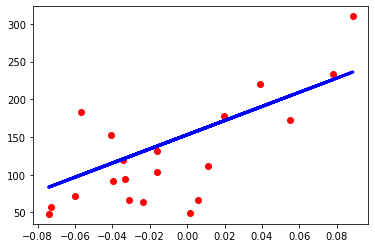

In [30]:
plt.plot(diabetes_X_test, diabetes_y_test, 'ro') 
plt.plot(diabetes_X_test, diabetes_y_pred, 'b-', linewidth=3)
plt.show()